In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/home/dheeraj/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dheeraj/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dheeraj/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dheeraj/.local/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:5

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist=input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
learning_rate=0.01
num_epoch=50
batch_size=128
examples= 20
display_step=5

In [5]:
num_inputs=784
num_hidden1=256
num_hidden2=128
num_hidden3=num_hidden1
num_output=num_inputs

In [6]:
X=tf.placeholder(tf.float32, shape=[None, num_inputs])

X=X/255.0

In [7]:
weights={
    'hid1':tf.Variable(tf.random_normal([num_inputs, num_hidden1])),
    'hid2':tf.Variable(tf.random_normal([num_hidden1, num_hidden2])),
    'hid3':tf.Variable(tf.random_normal([num_hidden2, num_hidden3])),
    'out':tf.Variable(tf.random_normal([num_hidden3, num_output]))
        }

In [8]:
biases={
    'hid1':tf.Variable(tf.random_normal([num_hidden1])),
    'hid2':tf.Variable(tf.random_normal([num_hidden2])),
    'hid3':tf.Variable(tf.random_normal([num_hidden3])),
    'out':tf.Variable(tf.random_normal([num_output]))
        }

In [9]:
def encoder(x):
    layer_1=tf.nn.relu(tf.add(tf.matmul(x, weights['hid1']), biases['hid1']))
    layer_2=tf.nn.relu(tf.add(tf.matmul(layer_1, weights['hid2']), biases['hid2']))
    
    return layer_2

In [10]:
def decoder(x):
    layer_1=tf.nn.relu(tf.add(tf.matmul(x, weights['hid3']), biases['hid3']))
    layer_2=tf.nn.relu(tf.add(tf.matmul(layer_1, weights['out']), biases['out']))
    
    return layer_2

In [25]:
encoder_op=encoder(X)
decoder_op=decoder(encoder_op)


In [12]:
y_pred=decoder_op

y_true=X



In [13]:
loss=tf.reduce_mean(tf.square(y_pred- y_true))
optimizer=tf.train.AdadeltaOptimizer(learning_rate).minimize(loss)



In [14]:
init=tf.global_variables_initializer()

In [15]:
saver=tf.train.Saver()

In [16]:
num_epochs=30
batch_size=128

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(num_epochs):
        num_batches=mnist.train.num_examples //batch_size
        
        for iteration in range(num_batches):
            
            x_batch, y_batch=mnist.train.next_batch(batch_size)
            
            sess.run([optimizer, loss], feed_dict={X:x_batch})
        training_loss = loss.eval(feed_dict={X:x_batch})
        
        
        print("EPOCH: {}   LOSS: {}".format(epoch, training_loss))
        
    saver.save(sess, './model_save_ae/stacked_autoencoder.ckpt')

EPOCH: 0   LOSS: 31437884.0
EPOCH: 1   LOSS: 26353392.0
EPOCH: 2   LOSS: 22917374.0
EPOCH: 3   LOSS: 19653172.0
EPOCH: 4   LOSS: 15652315.0
EPOCH: 5   LOSS: 13217319.0
EPOCH: 6   LOSS: 11203150.0
EPOCH: 7   LOSS: 9650395.0
EPOCH: 8   LOSS: 7928288.0
EPOCH: 9   LOSS: 6825532.0
EPOCH: 10   LOSS: 5915900.5
EPOCH: 11   LOSS: 5118460.5
EPOCH: 12   LOSS: 4384875.0
EPOCH: 13   LOSS: 3863049.75
EPOCH: 14   LOSS: 3214202.75
EPOCH: 15   LOSS: 2904167.25
EPOCH: 16   LOSS: 2588180.5
EPOCH: 17   LOSS: 2310134.0
EPOCH: 18   LOSS: 2056112.375
EPOCH: 19   LOSS: 1703201.625
EPOCH: 20   LOSS: 1664346.75
EPOCH: 21   LOSS: 1462398.5
EPOCH: 22   LOSS: 1238883.0
EPOCH: 23   LOSS: 1196220.625
EPOCH: 24   LOSS: 1050051.875
EPOCH: 25   LOSS: 1020104.1875
EPOCH: 26   LOSS: 822202.875
EPOCH: 27   LOSS: 743316.25
EPOCH: 28   LOSS: 659040.1875
EPOCH: 29   LOSS: 606435.5625


In [18]:

with tf.Session() as sess: 
    
    saver.restore(sess,  './model_save_ae/stacked_autoencoder.ckpt' )
    
    results=y_pred.eval(feed_dict={X:mnist.test.images[:examples]})

INFO:tensorflow:Restoring parameters from ./model_save_ae/stacked_autoencoder.ckpt


Figure(1440x288)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc32a033d68>


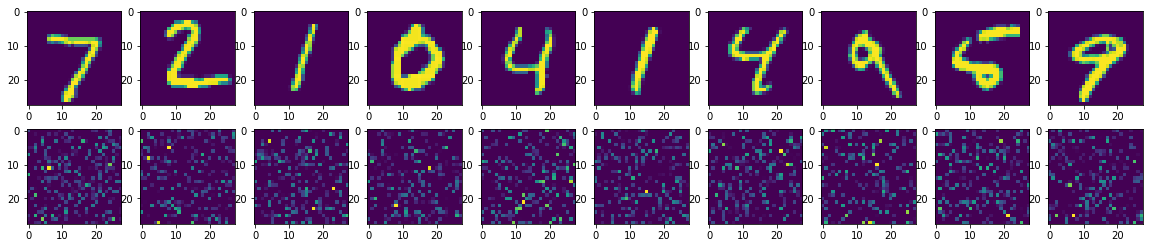

In [23]:
f, a=plt.subplots(2, 10, figsize=(20,4))
print(f)
print(a)
num_test_images=10
for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28,28))  )
    a[1][i].imshow(np.reshape(results[i], (28,28))  )
    